# Telco Churn

## Goal:


1. Find drivers for customer churn at Telco.

2. Construct a ML classification model that accurately predicts customer churn.

3. Deliver a report that a non-data scientis can read through and understand what setps were taken, why and what was the outcome?


# Imports 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

import matplotlib as plt
import seaborn as sns
import pandas as pd 

# showing max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Acquire
* data acquired from Telco Database.


# Prepare

* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Checked for nulls in the data (there were none)
* Checked that column data types were appropriate
* Removed white space from values in object columns
    * Used target variable: Churn
*Outliers have not been removed for this iteration of the project

| Feature | Dictionary |
|:--------|:-----------|
|contract_type_id| The id number of each contract type for each customer in telco churn.
|customer_id| The id number of each customer 
|senior_citizen|	Determines a 1 for is a senior citizen and a 0 for not a senior citizen
|internet_service_type_id|	The id for each internet service product offered.
|payment_type_id|	The id for each payment type for customers.
|monthly_charges|	The amount of monthly charges of each customer.
|total_charges| The total amounnt from each customer
|Tenure| The number of total months a customer churns.
|gender| The gender of each customer M /or F
|partner| The number of each customer with a significant other on record.
|dependents| The number of each customer with children on record.
|phone_service| The number of each customer with a phone line added into their service.
|multiple_services| The category of each customer with more than one phone service and no service at all.
|online_security| The number of each customer with added online security into their service.
|device_protection| The number of each customer with added device protection into their service.
|tech_support| The number of each customer with added tech support into their service.
|streaming_tv| The number of each customer with added streaming tv into their service.
|streaming_movies| The number of each customer with added streaming movies into their service.
|paperless_billing| The number of each customer with added paperless billing into their service.
|churn| The number of each customer that has churned when the data was found.
|contract_type| The type of contract(month to month, one year, two year) each customer has on record. 


## Data Sample

#### Sample of the Telco Dataset and column names

In [2]:
prepare.telco_df().head()

,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,payment_type_id,monthly_charges,total_charges,churn,month_to_month_contract,one_year_contract,two_year_contract,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_No,paperless_billing_Yes,IST_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,0,1,1,9,1,1,2,65.6,593.30,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1
1,1,0,0,0,0,9,1,1,2,59.9,542.40,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,2,1,73.9,280.85,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,2,1,98.0,1237.85,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,2,2,83.9,267.40,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1


## Data Summary

In [3]:
prepare.telco_df().describe()

,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,payment_type_id,monthly_charges,total_charges,churn,month_to_month_contract,one_year_contract,two_year_contract,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_No,paperless_billing_Yes,IST_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.690473,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,1.872923,2.315633,64.761692,3241.911359,0.265370,0.550192,0.209144,0.240664,0.481329,0.096834,0.421837,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.395428,0.216669,0.387903,0.398978,0.216669,0.384353,0.407781,0.592219,0.343746,0.439585,0.216669,0.219225,0.216101,0.335794,0.228880
std,0.833755,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.737796,1.148907,30.090047,6848.637794,0.441561,0.497510,0.406726,0.427517,0.499687,0.295752,0.493888,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.488977,0.412004,0.487307,0.489723,0.412004,0.486477,0.491457,0.491457,0.474991,0.496372,0.412004,0.413751,0.411613,0.472301,0.420141
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,422.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,2.000000,2.000000,70.350000,1468.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,3.000000,89.850000,4116.475000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.0000

## Explore

#### Analysis
###### Are tenure and payment type dependent factors?

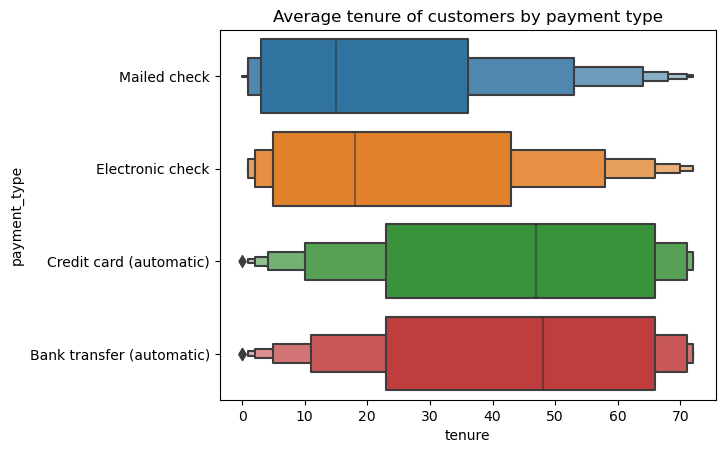

In [4]:
prepare.boxen_plot()

**Takeaways** 
* Credit cared and bank transfer had similar spread distributions with close medians. 
* Although mailed check had the lowest median, the range was noticably significant that customers with a larger range.
* The chart is informative in analyzing tenure and payment type but assuming mailed checks with lowest median tenure can cause churn may be a reach.

#### Analysis
###### Is payment type and senior citizens variables that are dependent with tenure?

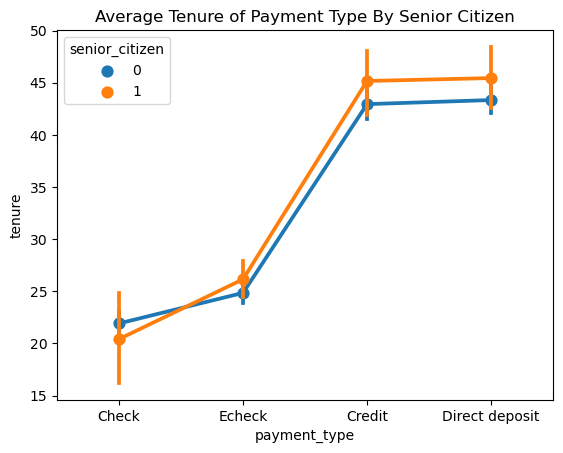

In [5]:
prepare.point_plot()

**Takeaways**
* The graph represents that customers who use Direct banking and credit cards have higher average tenure months than check and echeck options.
* The variables are too similar in the graph representation to show if there is a relationship between senior citizen, payment types and tenure.
* These findings will not be helpful in finding a relationship for drivers that affect churn.

### Analysis

###### Is there a significant relationship between churn and contract type?


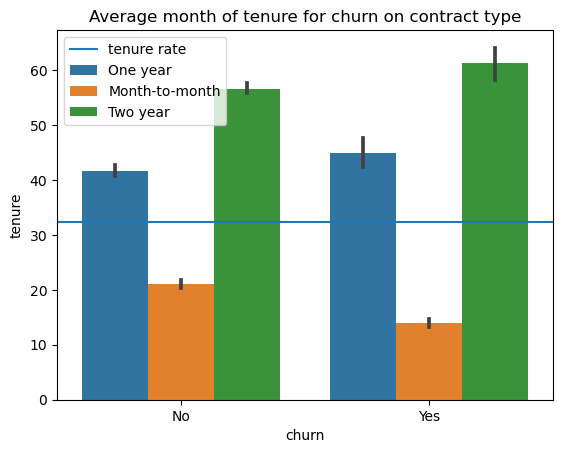

In [6]:
prepare.churn_contract_barplot()

**Takeaways**

* Contract type + churn + tenure = the highest average of tenure for those that have churned is 2 year contracts. 
* Internet service type + churn + tenure = the lowest average tenure is month to month for people who churn.
* Finding that the lowest and highest averages of tenure for contract type can be assumed that these variables can play a factor in churn.

###### Chi2 testing

* Using a conifdence level of 95% 
* Using α = .05

Analyze for a significant relationship between the contract type for customers who churn.

* $H_O$: There is no significant relationship between churn and contract type. 
* $H_a$: There is a significant relationship between churn and contract type.

In [7]:
prepare.churn_contract_type()

t = 1184.5965720837926
p = 5.863038300673391e-258


(None, None)

**The p-value is significantly less than the alpha.** 
*Therefore, there is evidence to support that the two variables churn and contract type have a significant relationship that churn is dependent on contract type. Based on this, we can reject the null hypothesis and are confident in our findings contract type is a driver of churn.*

### Analysis

###### Is there a significant relationship between churn and internet service type?

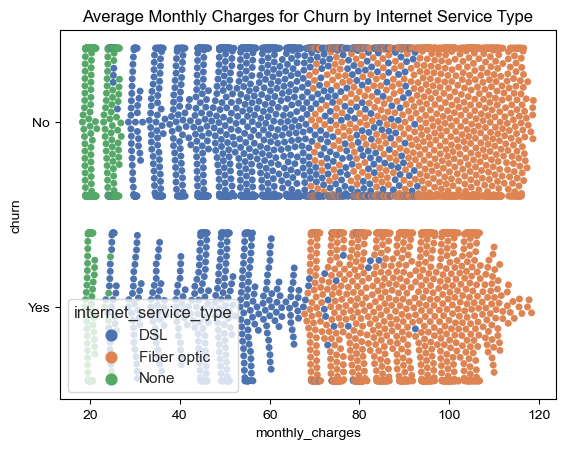

In [8]:
prepare.churn_swarmplot()

There is a noticable spread in customers who churn are paying for Fiber Optic with average monthly charges of 65-70+ dollars than those that are on other internet service type plans. 

I will run a chi-square test to see if **"churn"** and **"Internet Service Type"** are dependent on one another.

* $H_O$: Customers who churn are less likely to have fiber optic than other internet service pacakages. 
* $H_a$: Customers who churn are more likely to have fiber optic than other internet service pacakages.

In [9]:
prepare.churn_internet_service()

t = 732.309589667794
p = 9.571788222840544e-160


(None, None)

**The p-value is significantly less than the alpha.** 
*Therefore, there is evidence to support that the two variables churn and internet service type have a significant relationship that churn is dependent on contract type. Based on this, we can reject the null hypothesis and are confident in our findings contract type is a driver of churn.*

### Modeling

- baseline accuracy
- Not Churn is the most occuring value of our target variable with a baseline accuracy of 0.73

In [10]:
prepare.dtc_model()

train_accuracy: 0.7347197565305605
validate_accuracy: 0.7345635202271115


(None, None)

**Although decision tree clasifier had models with near differences, the model was not as high of an accuraccy with my other two models.**

In [11]:
prepare.rfc_model()

train_accuracy: 0.7600811564798376
validate_accuracy: 0.7572746628814763


(None, None)

**Random Forest accuracy is near my baseline accuracy, I used this model as my best model in my findings.**

In [12]:
prepare.log_model()

Accuracy of Logistic Regression classifier on training set: 0.80


**Log model presented the highest model to use for my final report.**

# Conclusions

###### Recommendations

I am adamant that two year contracts are have such a high average tenure for churn on contract types. 
My findings show that **month to month contract types are more likely to churn than other contract types** but in *my experience contract lengths have been more likely to be to churn as customers who receive contract price increases leave companies*. 